# Importing Neccessary Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the dataset

In [4]:
data=pd.read_csv("datasets_11167_15520_train.csv")
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


# Basic Checks and Data Cleaning

In [6]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [8]:
duplicates = data.duplicated().sum()
duplicates

0

#### There are no duplicates in the data. Duplicates can mess up your results by making the model think certain patterns are more common than they actually are. This can lead to overfitting, where the model performs well on the training data but poorly on new, unseen data.


In [10]:
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [11]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### No null values are present in the data

# EDA

In [14]:
# Set the display option to show all columns
pd.set_option('display.max_columns', None)

data.describe()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000



#### In the give data it is obseved that the dependent variable is "price_range" and we have to impliment a model that classifies the "cellphones" to the different "price_range" (0,1,2,3) based on the all other independent variables.In the dataset some independent variables have binary values (0,1) and it's meaning is yes or no. For example blue 0 or 1. That means the given cellphone have bluethoth or not.let us see the variable that are non binary values.
####

#### 1) battery_power: The maximun value of battery_power is 1998 and minimum value is 501 having mean value 1238.5185 and std 439.418206 which indicates that wide range of battery_power in the cellphones.
####
#### 2) clock_speed: The max clock_speed is 3 and the min is 0.50 having mean 1.522250 and std around 0.81 which indicates that the clock_speed is concentreted around its mean in other word the maximum of cellphones have clock_speed near about its mean.
####
#### 3) fc: The max fc is 19 and the min is 0 having mean around 4.30 and std around 4.34 which indicates that moderate to high spread of fc, but maximum of cellphones have the low value of fc but some having the value 19 that is max. Because the mean is more close to the min value.
####
#### 4) int_memory: The max value of int_memory is 64 and the min value is 2, with a mean of approximately 32 and a standard deviation of 18.14. This suggests that the int_memory values are quite spread out around the mean. The large standard deviation indicates considerable variability, meaning that while some values are near the mean, many others are widely dispersed, reaching close to the minimum and maximum values.
####
#### 5) m_dep: The max value of m_dep is 1 and the min value is 0.1, with a mean of around 0.50 and a standard deviation of approximately 0.28. This indicates a moderate concentration of m_dep values around the mean. The standard deviation suggests that the values are fairly close to the mean, but there is still some variability, with data points spread within the range, including near the minimum and maximum values.
####
#### 6) mobile_wt: The max value of mobile_wt is 200 and the min value is 80, with a mean of around 140 and a standard deviation of approximately 35. This indicates a moderate spread of mobile_wt values around the mean. The values are distributed around the mean, with some data points closer to the min and max values.
####
#### 7) n_cores: The max value of n_cores is 8 and the min value is 1 having mean around 4.52 and std around 2.8 which indicates that the values of n_cores are moderately concentrated aronud the mean but some values are still spread across the range including min and max values.
####
#### 8) pc: The max value of pc is 20 and min is 0 having mean around 9.91 and std around 6 which indicates that many values are concentrated around the mean still many values of pc have wide spread over range.
####
#### 9) px_height: The max value of px_height is 1960 and min is 0 having mean around 665 and std around 443 which indicates that many values are concentrated around mean and many values are having a wide spread over the range but still the mean is close to the min value as compared to max value so the spread of values is more around the min and mean as compared to max value
####
#### 10) px_width: The max value of px_width is 1998 and the min is 500 having mean around 1251 and std arround 432 which indicates that  many values are concentrated around mean still many of the values are spread over range but maximum values are concentrated around mean and the max value as compared to min value.
####
#### 11) ram: The max value of ram is 3998 and the min is 256 having mean around 2124 and std around 1084 which indicates that the values of ram have high spread over range, but still more values are concentrated around mean because the mean is around the center value.
####
#### 12) sc_h: The max value of sc_h is 19 and the min is 5 having mean value around 12.30 and std 4.21 which indicates that the maximum concentration of sc_h values is around the mean, the std indicates that there may some values which are spread over the range including max and mean values.
####
#### 13) sc_w: The max value of sc_w is 18 and the minimum is 0 which is not possible. Because the cellphone cannot be have sc_w 0 cm. The world smallest sc_w phone is also have the sc_w of around 5 cm. Here we can use the median or  mode to replece these corrupt values. We can't use mean here because it is already affected by the natural outliers.
#### 
#### 14) talk_time: The max value of talk_time is 20 hrs and the min is 2 hrs having mean arond 11 hrs and std around 5.46 hrs which indicates that the talk_time values are modratley concentrated around the mean values, still the std indicates that the values have spread over range including max and min values
####


## 1) Univariate Analysis

<Axes: xlabel='price_range', ylabel='count'>

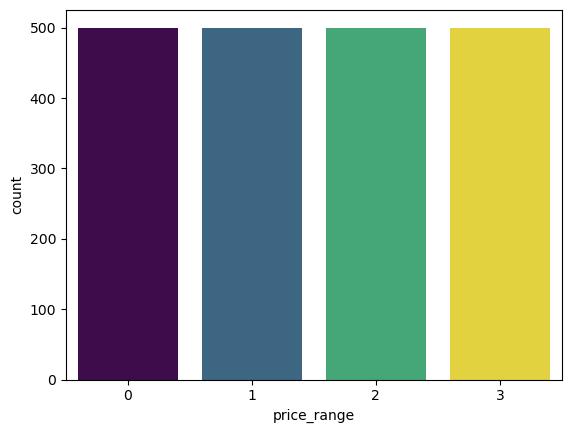

In [17]:
sns.countplot(x= "price_range",data=data, hue="price_range", palette="viridis", legend=False)

#### From above countplot we can decide that the data is balanced that means every type of price_range have same number of observations in the data. So there is no need for balancing in the in future.


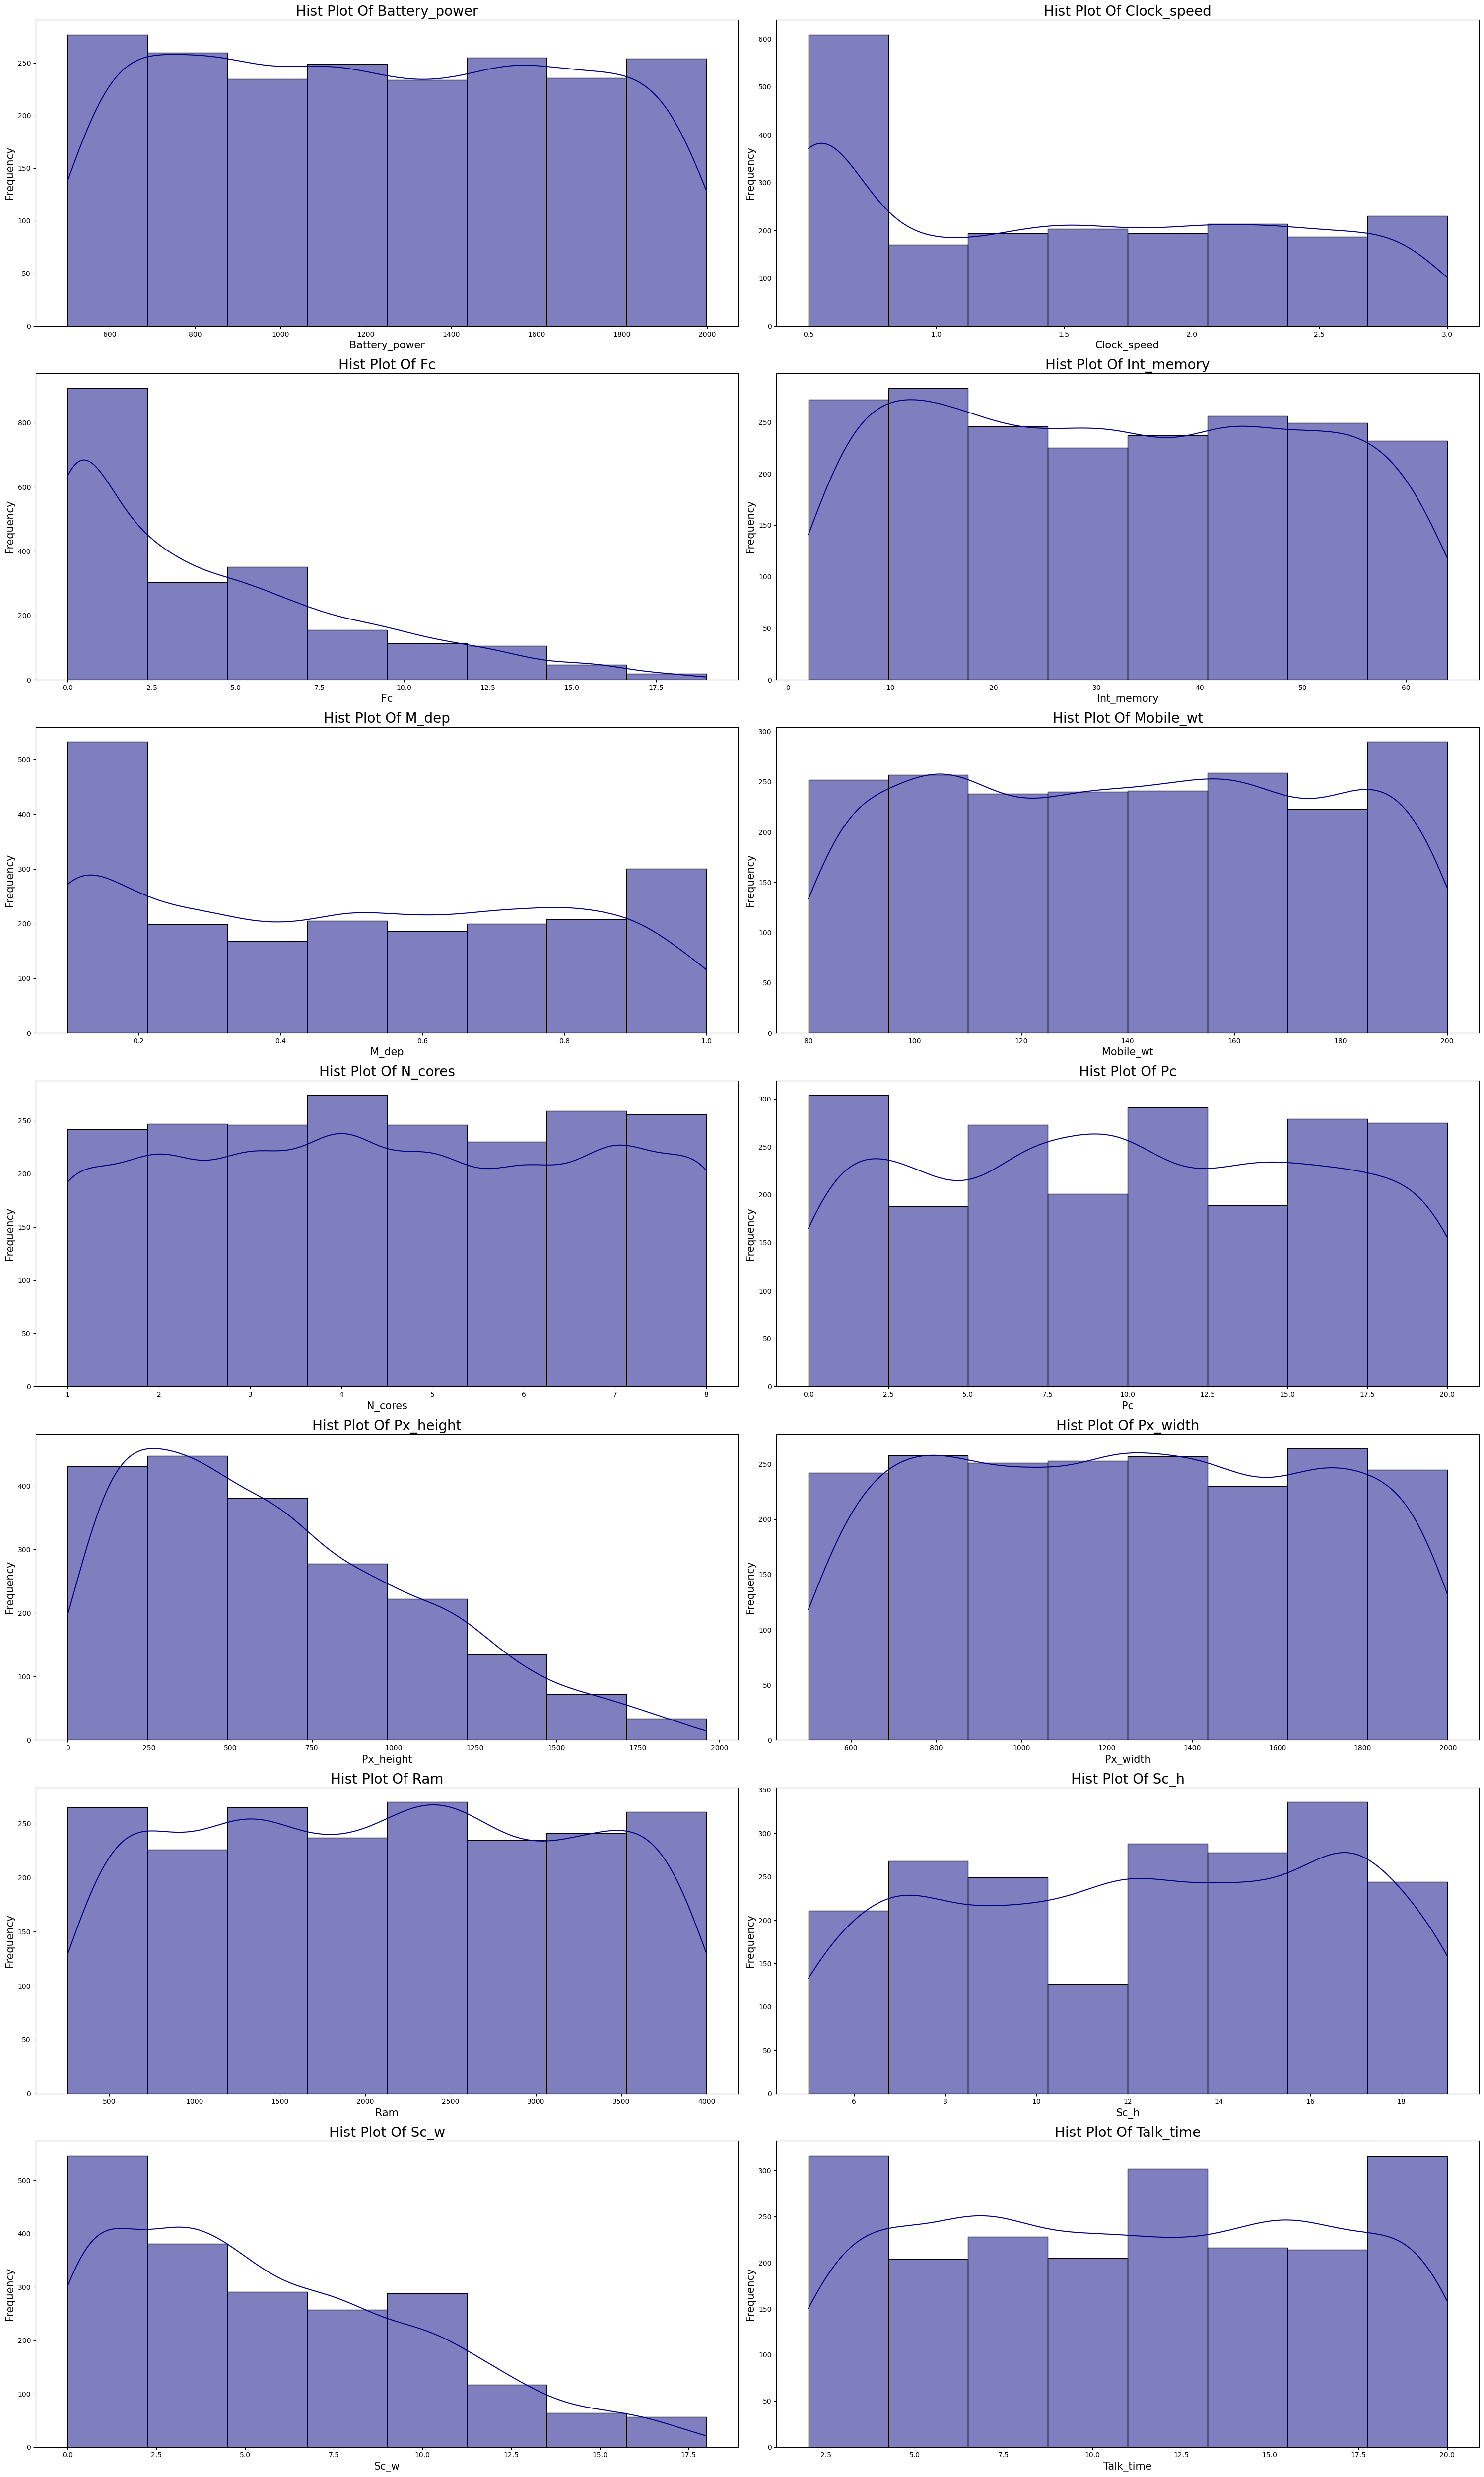

In [19]:

features = ['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores', 'pc', 'px_height', 'px_width', 'ram','sc_h','sc_w','talk_time'] 
data = data

# Create the figure
plt.figure(figsize=(30, 50))
i = 1
for feature in features:
    plt.subplot(7, 2, i)  
    sns.histplot(x=feature, data=data, kde=True, bins=8, color='navy')
    plt.title(f'Hist Plot Of {feature.capitalize()}', fontsize=20)
    plt.xlabel(feature.capitalize(), fontsize=15)
    plt.ylabel('Frequency', fontsize=15)
    i += 1 

plt.tight_layout()
plt.show()


### Interpretation:
#### 1) Histplot of Battery Power: On average, battery power in cellphones is evenly spread across a wide range, with nearly equal numbers in each range. This suggests manufacturers offer various battery capacities to meet different needs.
####
#### 2) Histplot of Clock Speed: On average, many mobile phones have clock speeds between 0.5 GHz and 1 GHz. Phones with clock speeds from 1 GHz to 3 GHz are almost evenly distributed. This suggests that manufacturers tend to offer lower clock speeds.
####
#### 3) Histplot of Front Camera: On average, many cellphones have front cameras ranging from 0 to 2.5 MP. As the camera quality increases, the number of phones decreases, with a slight rise in the 5 to 7.5 MP range. This suggests that manufacturers might not prioritize high-quality front cameras, which could be a drawback as customers seek better selfie capabilities.
#### 
#### 4) Histplot of Internal Memory :  On average, internal memory in cellphones is evenly spread across various ranges. However, there is a noticeable peak in the 10 to 20 GB range. This suggests that most mobile companies tend to focus on providing low to medium storage options, likely aiming to balance affordability and functionality for a broad range of users.
####
#### 5) Histplot of Mobile Depth: On average, cellphone companies tend to focus on producing slim phones, as evidenced by the noticeable peak in the 0 to 0.2 cm depth range. This suggests that slimmer phones are more popular. Beyond this range, the number of phones decreases, except for a slight rise between 0.8 to 1 cm, indicating a secondary preference for slightly thicker models.
####
#### 6) Histplot of Mobile Weight: On average, cellphones are evenly distributed across different weight categories. However, there's a noticeable peak in the 180 to 200 grams range, suggesting that many manufacturers prefer to produce medium to heavy cellphones. This likely reflects a focus on balancing durability and performance.
#### 
#### 7) Histplot of Number of Cores: On average, most manufacturers prefer cellphones with 3 to 5 cores, as these models strike a balance between performance and efficiency. Cellphones with other numbers of cores are evenly distributed.
#### 
#### 8) Histplot of Primary Camera: On average, primary camera cellphones are evenly distributed across various ranges. However, certain ranges, specifically 2.5 to 5 MP, 7.5 to 10 MP, and 12.5 to 15 MP, have fewer cellphones. This indicates that these particular camera quality ranges are less commonly produced by manufacturers.
####
#### 9) Histplot of Pixel Height: On average, as pixel height increases, the number of cellphones decreases. There are noticeable peaks in the ranges of 0 to 250 px, 250 to 500 px, and 500 to 750 px. This trend indicates that higher pixel heights are less common in cellphones.
#### 
#### 10) Histplot of Pixel Width: On average, all pixel width ranges have nearly the same number of cellphones. However, manufacturers favor certain widths to balance display quality and power consumption, catering to user preferences.
####
#### 11) Histplot of RAM: On average, the number of cellphones is similar across all RAM categories. However, there are noticeable peaks in the 0 to 500 MB, 1000 to 1500 MB, and 2000 to 2500 MB ranges. This suggests that manufacturers prefer to produce cellphones with low to medium RAM. Nonetheless, there are also some phones with higher RAM options available.
####
#### 12) Histplot Of Screen Height: On average, cellphones are evenly distributed across different screen height ranges. However, there is a noticeable peak between 16 to 18 cm, while the 10 to 12 cm range has the lowest number of phones. This suggests that manufacturers focus on producing cellphones with larger screen heights, while fewer phones are made with medium-sized screens of 10 to 12 cm.
####
#### 13) Histplot of Screen Width: On average, most cellphones fall within the screen width categories of 0 to 2.5 cm.
####
#### 14) Histplot of Talk Time : On average, most cellphones fall into the categories of 2.5 to 5 hours, 10 to 12.5 hours, and 17.5 to 20 hours. The remaining cellphones are evenly spread across other ranges. This suggests that manufacturers focus on these specific battery life categories.
####


## 2) Bivariate Analysis


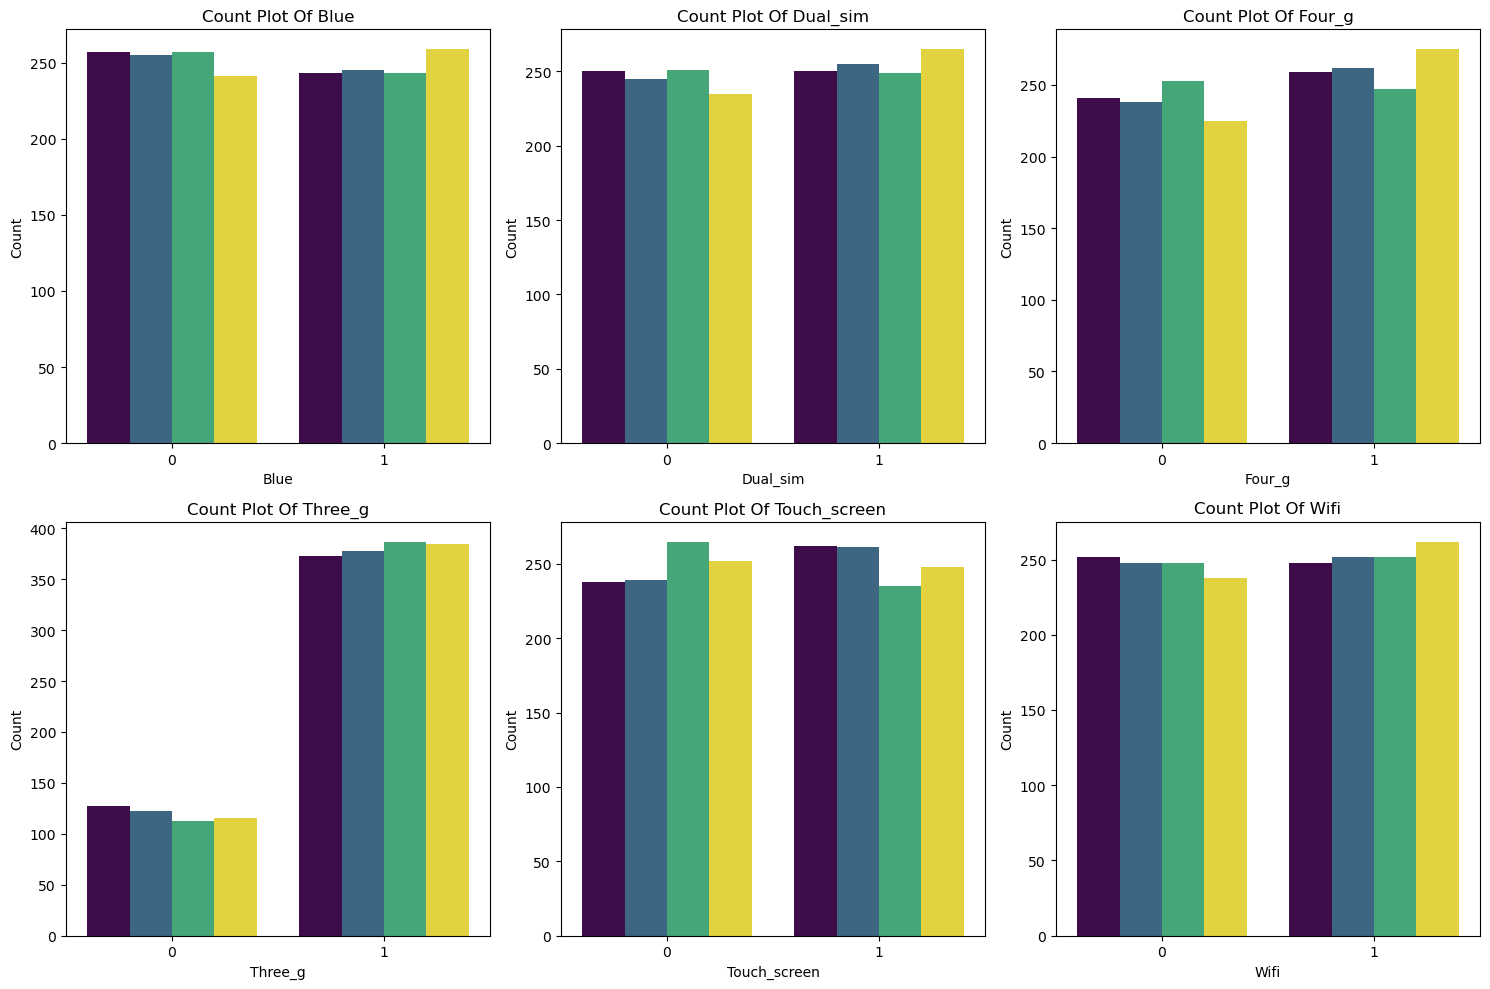

In [22]:
features_1=['blue','dual_sim','four_g', 'three_g','touch_screen', 'wifi' ]
data = data

# Create the figure
plt.figure(figsize=(15, 10))
i = 1
for feature_1 in features_1:
    plt.subplot(2, 3, i)  
    sns.countplot(x=feature_1, data=data, hue= 'price_range', palette= 'viridis', legend=False)
    plt.title(f'Count Plot Of {feature_1.capitalize()}')
    plt.xlabel(feature_1.capitalize())
    plt.ylabel('Count')
    i += 1 

plt.tight_layout()
plt.show()

### Interpretation:
#### 1) Count Plot of Bluetooth: On average, cellphones are evenly distributed across all price ranges, with or without Bluetooth. However, most high-priced phones have Bluetooth. Interestingly, some expensive phones lack Bluetooth, which is surprising because it's a basic feature. This could be a downside for those manufacturers.
####
#### 2) Count Plot of Dual Sim: On average, cellphones are evenly distributed across all price ranges, whether they have dual SIM capabilities or not. Most high-priced phones feature dual SIM. Interestingly, some expensive phones lack this feature, which is surprising because dual SIM is considered basic for many users. This could be a downside for those manufacturers. Additionally, many low-priced cellphones also offer dual SIM capabilities, showing that this feature is not limited to high-end models.
#### 
#### 3) Count Plot of 4G: On average, more cellphones have 4G connectivity than those without it. Across different price ranges, the count of cellphones with and without 4G connectivity is nearly equal. However, there is a slight increase in the number of 4G-enabled cellphones in the very high price range. Additionally, some lower-priced cellphones also offer 4G connectivity, demonstrating that this feature is not exclusive to premium models.
#### 
#### 4) Count Plot of 3G: On average, there's a significant difference between the number of cellphones with and without 3G connectivity, with most cellphones featuring 3G. This trend is consistent across all price ranges, indicating that 3G connectivity is a common feature in cellphones, regardless of cost.
####
#### 5) Count Plot of Touch Screen: On average, the touchscreen feature is evenly spread across different price ranges. However, it's noticeable that high-value cellphones have fewer touchscreen models. Additionally, high-priced phones are evenly distributed between those with and without touchscreens, showing nearly equal counts in both categories. This trend suggests that even at higher prices, the preference for touchscreens is balanced with non-touchscreen options.
#### 
#### 6) Count Plot of WiFi: On average, the number of cellphones with and without WiFi is nearly equal. Interestingly, some high-priced cellphones lack WiFi, while some low-priced cellphones include this feature. This is notable for manufacturers, as high and very high-priced cellphones without WiFi could be seen as a drawback, given that WiFi is a fundamental feature for many users.
####

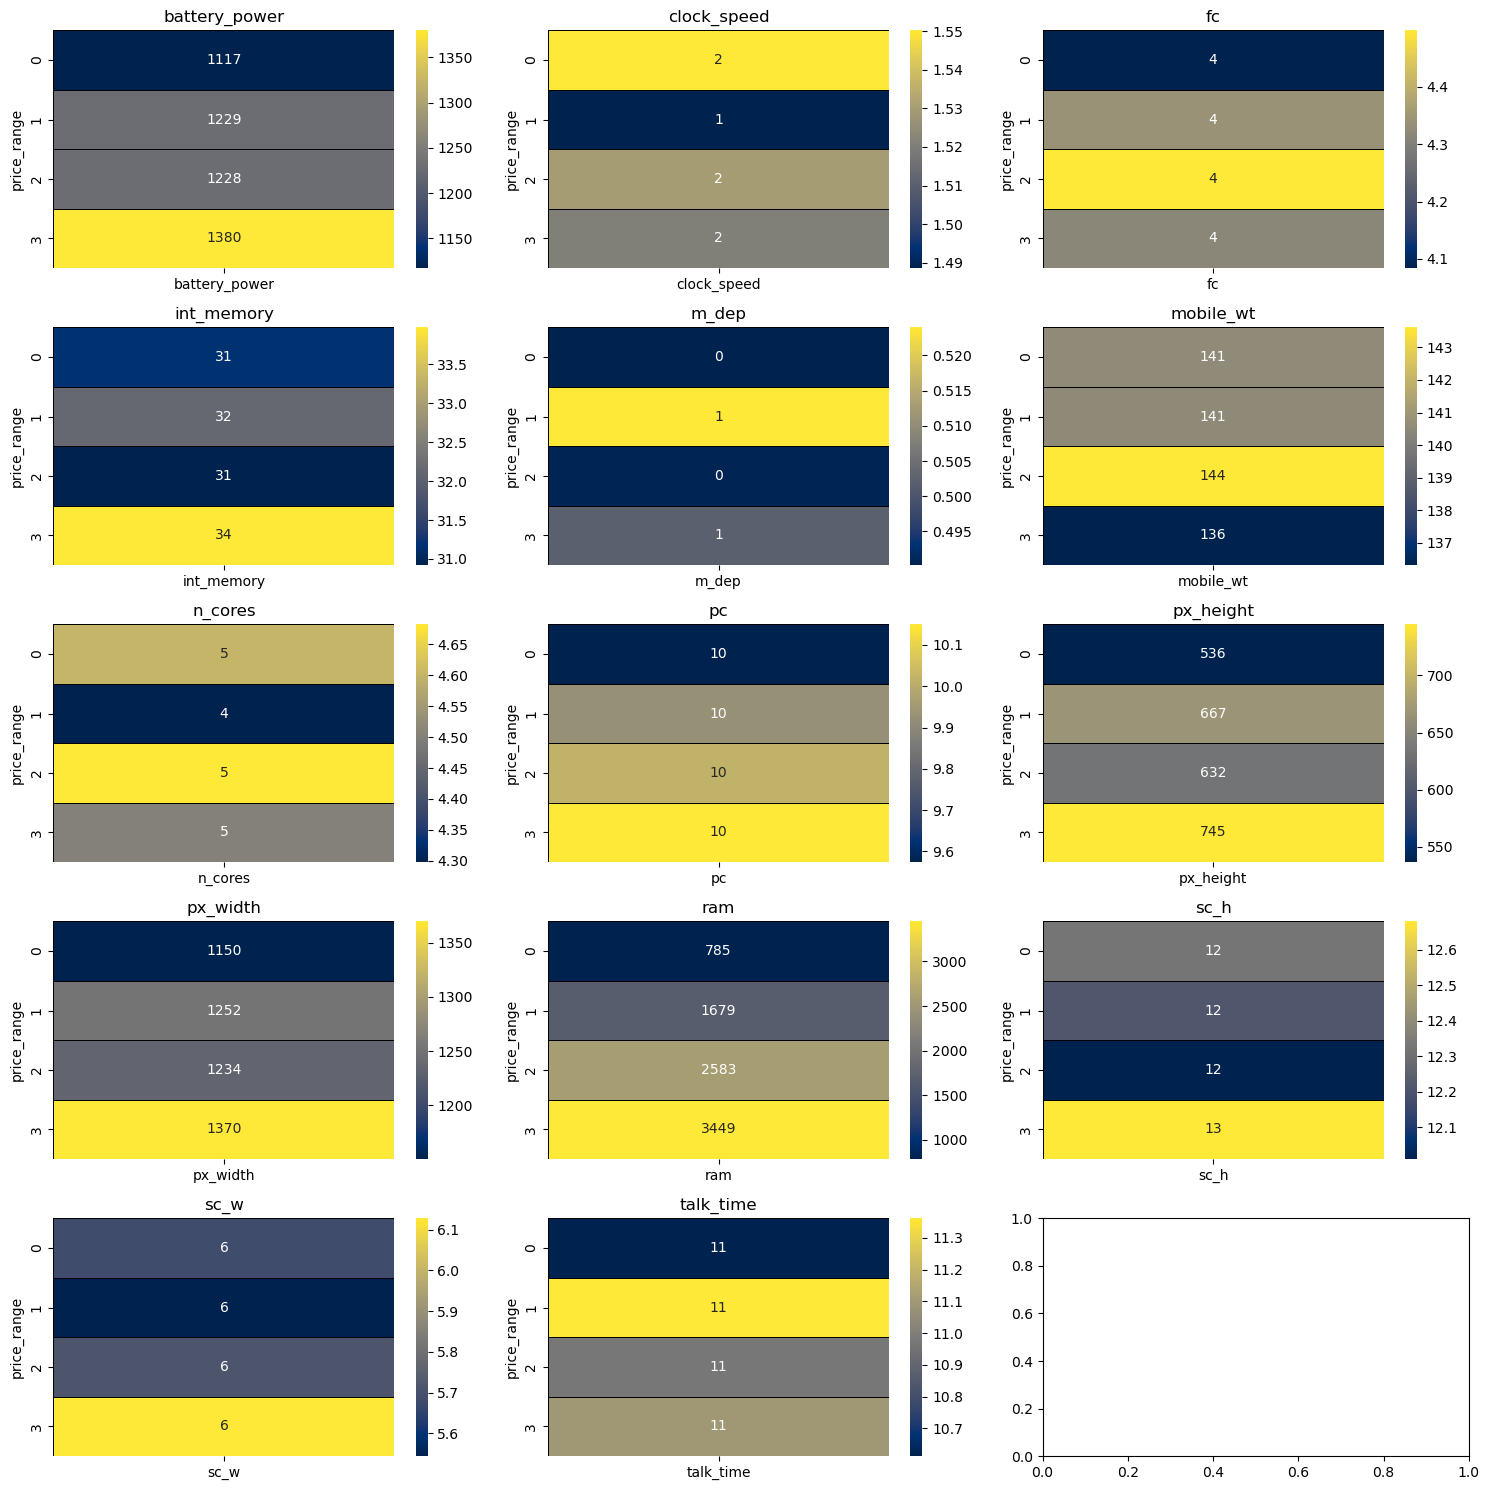

In [24]:

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

features = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

for i in range(len(features)):
    row = i // 3
    col = i % 3
    pivot_table = data.pivot_table(values=features[i], index='price_range', aggfunc="mean")
    sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='cividis', linewidths=.5, linecolor='black', ax=axes[row, col])
    axes[row, col].set_title(features[i])

# Show plot
plt.tight_layout()
plt.show()


### Interpretation:
#### 1) Battery Power Heatmap: As the price range increases, so does the average battery power. In the Low price range (Price Range 0), it is 1117 mAh, rising to 1229 mAh in the Medium price range (Price Range 1). However, there is a slight dip in the High price range (Price Range 2) to 1228 mAh, before peaking at 1380 mAh in the Very High price range (Price Range 3).
####
#### 2) Clock Speed Heatmap:  The average clock speed is generally consistent across all price ranges at 2 GHz, except for the Medium price range (Price Range 1), where it is noticeably lower at 1 GHz. This discrepancy suggests that manufacturers should aim to ensure a uniform clock speed across all price ranges. Ideally, clock speed should increase with higher price ranges to enhance performance and meet user expectations. By maintaining or improving clock speed as the price range increases, manufacturers can provide a more consistent and satisfying user experience across different device tiers.
####
#### 3) Front Camera Heatmap: Across all price ranges, the average front camera resolution is consistently 4 MP. This uniformity is not aligned with the varying price points, suggesting that manufacturers should pay more attention to enhancing front camera features. By focusing on improving camera quality in higher-priced models, manufacturers can better justify the price differences and provide greater value to consumers looking for superior photography capabilities.
#### 
#### 4) Internal Memory Heatmap: The average internal memory for both the Low (Price Range 0) and High (Price Range 2) price ranges is 31 GB. There is a slight increase in the Medium price range (Price Range 1) to 32 GB. However, the internal memory reaches its peak in the Very High price range (Price Range 3). This suggests that manufacturers are primarily focused on enhancing the internal memory for the top-tier devices, as the other price ranges offer nearly similar average internal memory capacities.
####
#### 5) Mobile Depth Heatmap: It is observed that Low (Price Range 0) and High (Price Range 2) price range phones primarily focus on being slim. In contrast, Medium (Price Range 1) and Very High (Price Range 3) price range phones do not prioritize slimness, likely due to factors like larger batteries or additional features. This indicates that while slim design is a consideration in certain price segments, other priorities such as battery capacity and added functionalities take precedence in mid to high-end devices.
#### 
#### 6) Mobile Weight Heatmap: The average mobile weight for the Low to Medium price ranges remains the same at 141 grams. As the price range increases to High, the average mobile weight slightly increases to 144 grams. Interestingly, the Very High price range cellphones are lighter than all other categories, with an average weight of 136 grams. This weight reduction in the Very High price range indicates an advantage, likely due to the use of premium materials and advanced design techniques.
####
#### 7) Number of Cores Heatmap: The average number of cores is consistent across all price ranges, except for the Medium price range (Price Range 1), where the average is 4 cores compared to 5 cores in the other categories. This indicates a noticeable disparity, as all other price ranges provide nearly the same number of cores, which is not fully justified by the differences in price. Manufacturers should consider offering more differentiation in the number of cores to better align with the varying price points and should focus on increasing the number of cores in high to very high price range cellphones to ensure better performance and meet consumer expectations for premium devices.
#### 
#### 8) Primary Camera Heatmap: The average camera resolution remains the same at 10 MP across all price ranges. This uniformity does not justify the differences in price. Manufacturers should pay attention to this and ensure that high to very high price range cellphones have better camera quality, providing a clear differentiation and added value for customers investing in premium devices. Enhanced camera features in higher-priced models would better align with consumer expectations and price points.
####
#### 9) Pixel height Heatmap: The average pixel height varies across different price ranges. As the price range increases, so does the average pixel height, except for the High price range (Price Range 2). The Very High price range (Price Range 3) cellphones offer the highest average pixel height at 745 px. In comparison, the average pixel heights for Low (Price Range 0), Medium (Price Range 1), and High (Price Range 2) price range cellphones are 536 px, 667 px, and 632 px, respectively. This demonstrates that higher price ranges generally provide better display resolution, with the Very High price range leading in pixel height.
####
#### 10) Pixcel Width Heatmap: The average pixel width generally increases with the price range, with a minor exception in the High price range (Price Range 2), which may not be significant. Manufacturers have clearly focused on enhancing display quality as the price increases, ensuring that higher-priced models offer better screen resolution. This trend reflects the prioritization of superior display features in premium devices.
#### 
#### 11) RAM Heatmap: As the price range increases, the average RAM size also rises, which reflects a good decision by the manufacturers. Specifically, the average RAM sizes are 785 MB (approximately 0.77 GB) for the Low price range, 1679 MB (approximately 1.64 GB) for the Medium price range, 2583 MB (approximately 2.52 GB) for the High price range, and 3449 MB (approximately 3.37 GB) for the Very High price range. This focus on increasing RAM capacity with higher price ranges ensures better performance and multitasking capabilities in premium devices.
####
#### 12) Screen Height Heatmap: The average screen height for cellphones across all price ranges is generally consistent at 12 cm, except for the Very High price range, which offers a larger average screen height of 13 cm. This larger screen size is appropriate for the Very High price range category, providing a distinguishing feature that justifies the higher price. However, it raises questions about the High price range category, which does not show a significant increase in screen height compared to the lower price ranges. Manufacturers might consider increasing the screen height for high price range cellphones to better align with consumer expectations for premium features.
#### 
#### 13) Screen Width Heatmap: The average screen width for cellphones is generally 6 cm across all price ranges.
####
#### 14) Talk Time Heatmap: All cellphones, regardless of price range, have an average talk time of 11 hours. While this might seem unfair but it's balanced out by the different features offered in each category.
####

### To check more dependency let's plot an heatmap of all the features:

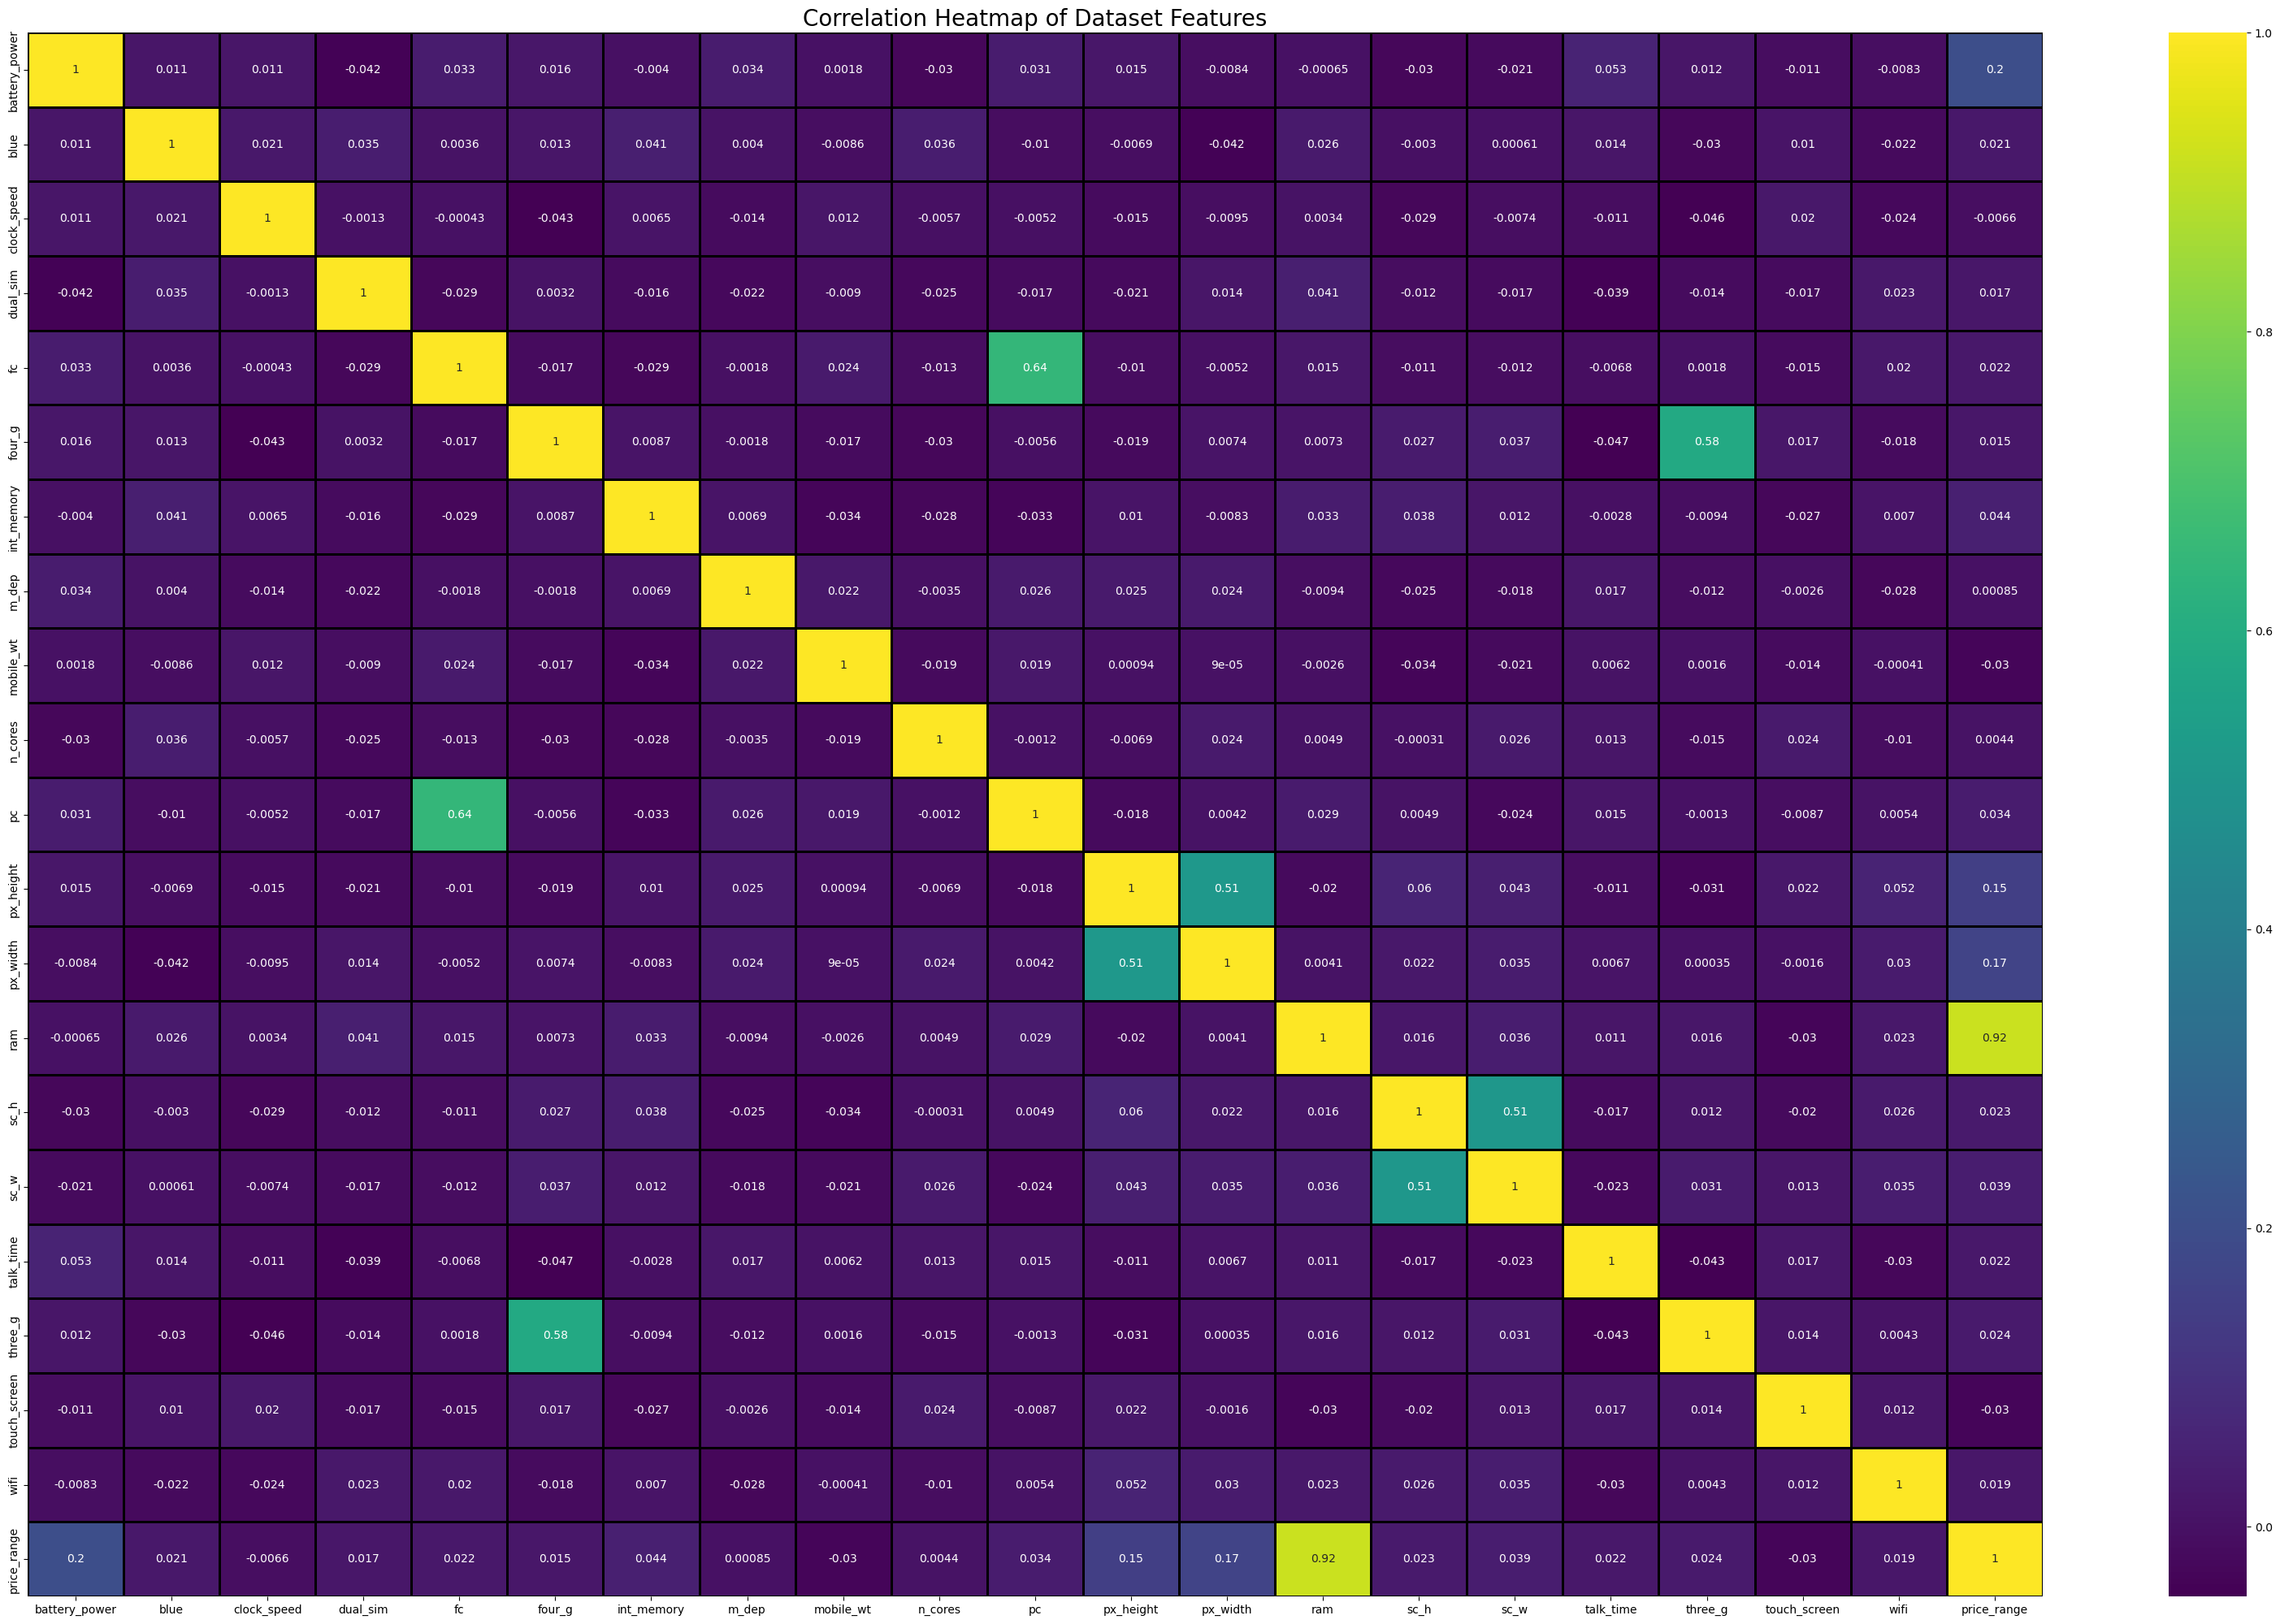

In [27]:
# Calculating the correlation matrix
correlation_matrix = data.corr()

# Creating the heatmap
plt.figure(figsize=(40, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=1, linecolor='black')

plt.title('Correlation Heatmap of Dataset Features', fontsize=20)
plt.show()


### Interpretation:
#### The heatmap indicates that there's no significant correlation between the dependent and independent variables, except for RAM, which shows a strong correlation with the target variable, price range. Therefore, it's crucial that all features (independent variables) contribute to the dependent variable to ensure a balanced and accurate classification. This will help in making more precise classifications and understanding the true impact of each feature on the price range.

#  Data Preprocessing and Feature Engineering.

## Outlier Handling

#### It is observed that there are too many zero entries for sc_w in the data, which is impossible. So, first, we will try to deal with those zero values.

In [32]:
# Get the total number of rows in the dataset
total_rows = data.shape[0]

# Count the number of zero values in sc_w
zero_count = (data["sc_w"] == 0).sum()

# Calculate percentage of zero values
zero_percentage = (zero_count / total_rows) * 100

print(f"Total number of rows in the dataset: {total_rows}")
print(f"Number of zero values in sc_w: {zero_count}")
print(f"Percentage of zero values in sc_w: {zero_percentage:.2f}%")


Total number of rows in the dataset: 2000
Number of zero values in sc_w: 180
Percentage of zero values in sc_w: 9.00%


#### Here the zero values in the sc_w can be singnificantly impact the analysis so we remove it.

In [34]:
# Remove rows where sc_w is 0
data_cleaned = data[data["sc_w"] != 0]

# Display the updated dataset shape
print(f"Original dataset shape: {data.shape}")
print(f"Cleaned dataset shape: {data_cleaned.shape}")

Original dataset shape: (2000, 21)
Cleaned dataset shape: (1820, 21)


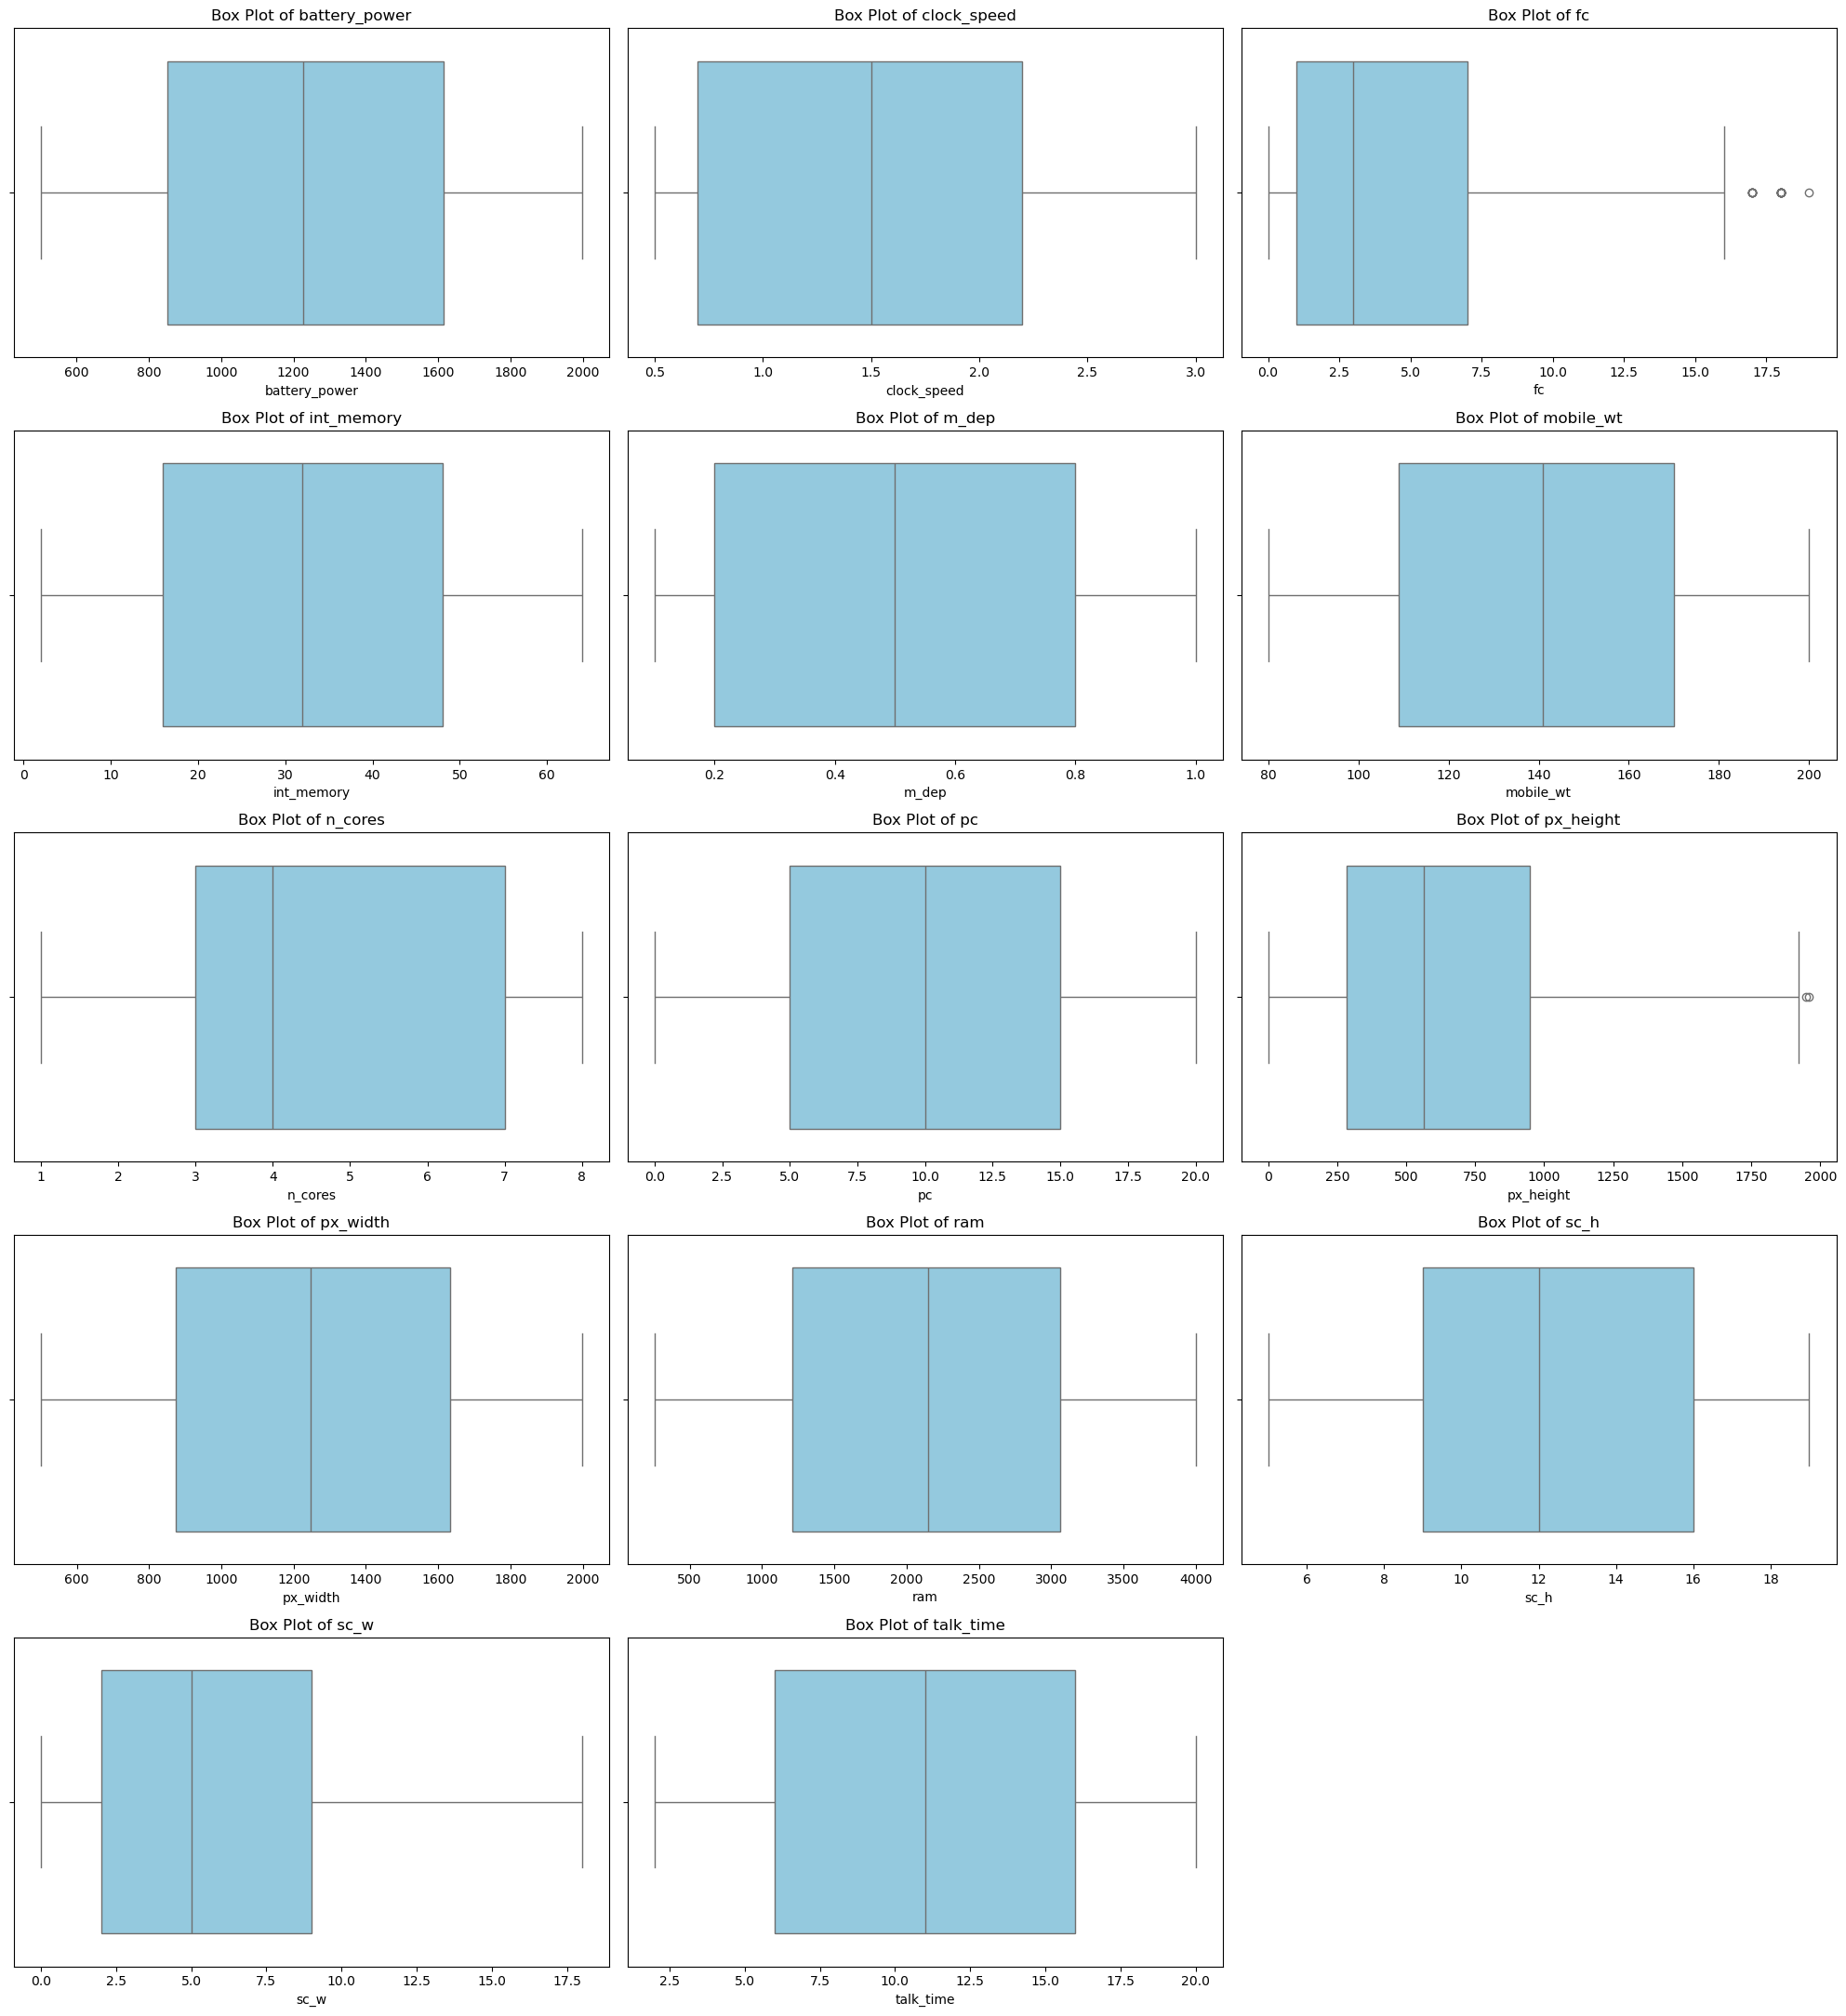

In [35]:
features = ["battery_power", "clock_speed",  "fc",
            "int_memory", "m_dep", "mobile_wt", "n_cores", "pc", "px_height", 
            "px_width", "ram", "sc_h", "sc_w", "talk_time"]

# Creating subplots
plt.figure(figsize=(20, 30))

for i, feature in enumerate(features, 1):
    plt.subplot(7, 3, i)  # Arranging plots in a grid
    sns.boxplot(x=data[feature], color="skyblue")
    plt.title(f"Box Plot of {feature}", fontsize=12)
    plt.xlabel(feature, fontsize=10)

plt.tight_layout()
plt.show()


#### Now we know that the others are natural outliers, so we consider those values as normal because, in the context of smartphones, they are possible.

## Standerdization

In [38]:
from sklearn.preprocessing import StandardScaler

# List of features to standardize
features_to_standardize = ["battery_power", "clock_speed", "dual_sim", "fc", "int_memory", 
                           "m_dep", "mobile_wt", "n_cores", "pc", "px_height", "px_width", 
                           "ram", "sc_h", "sc_w", "talk_time"]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the selected features
data[features_to_standardize] = scaler.fit_transform(data[features_to_standardize])

# Display the standardized data
print(data.head())


   battery_power  blue  clock_speed  dual_sim        fc  four_g  int_memory  \
0      -0.902597     0     0.830779 -1.019184 -0.762495       0   -1.380644   
1      -0.495139     1    -1.253064  0.981177 -0.992890       1    1.155024   
2      -1.537686     1    -1.253064  0.981177 -0.532099       1    0.493546   
3      -1.419319     1     1.198517 -1.019184 -0.992890       0   -1.215274   
4       1.325906     1    -0.395011 -1.019184  2.002254       1    0.658915   

      m_dep  mobile_wt   n_cores        pc  px_height  px_width       ram  \
0  0.340740   1.349249 -1.101971 -1.305750  -1.408949 -1.146784  0.391703   
1  0.687548  -0.120059 -0.664768 -0.645989   0.585778  1.704465  0.467317   
2  1.381165   0.134244  0.209639 -0.645989   1.392684  1.074968  0.441498   
3  1.034357  -0.261339  0.646842 -0.151168   1.286750  1.236971  0.594569   
4  0.340740   0.021220 -1.101971  0.673534   1.268718 -0.091452 -0.657666   

       sc_h      sc_w  talk_time  three_g  touch_screen  wifi 

In [39]:
from sklearn.model_selection import train_test_split
X=data.iloc[:,:-1]
y=data.price_range
# Spliting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Implementation

## 1) Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
reg_model = LogisticRegression()
reg_model.fit(X_train, y_train)

LogisticRegression()

In [43]:
y_pred_reg = reg_model.predict(X_test)

Accuracy Score for Logistic Regression: 0.9583


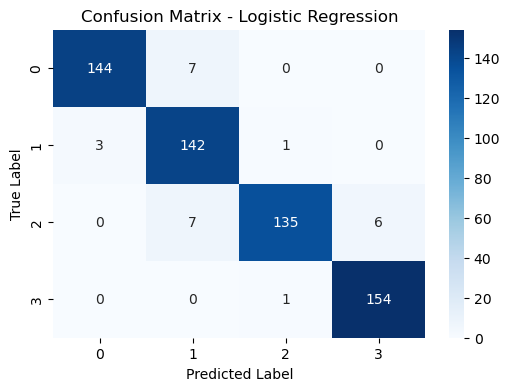

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       151
           1       0.91      0.97      0.94       146
           2       0.99      0.91      0.95       148
           3       0.96      0.99      0.98       155

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600



In [44]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Compute Accuracy Score
accuracy_score_reg = accuracy_score(y_test, y_pred_reg)
print(f"Accuracy Score for Logistic Regression: {accuracy_score_reg:.4f}")

# Compute Confusion Matrix
cm_reg = confusion_matrix(y_test, y_pred_reg)

# Plot Confusion Matrix using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm_reg, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Print Classification Report
print(classification_report(y_test, y_pred_reg))


#### The model has 96% accuracy, showing strong precision and recall across all classes. Classes 0, 1, 2, and 3 have high F1-scores (94%-98%), indicating balanced performance. Slightly lower recall in Class 1 & 2 suggests some missed predictions. Overall, the model is well-optimized for smartphone price classification.
####

## 2) Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [48]:
y_pred_dt = dt_model.predict(X_test)

Accuracy Score for Decision Tree: 0.8183
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       151
           1       0.74      0.81      0.77       146
           2       0.75      0.74      0.74       148
           3       0.88      0.86      0.87       155

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600



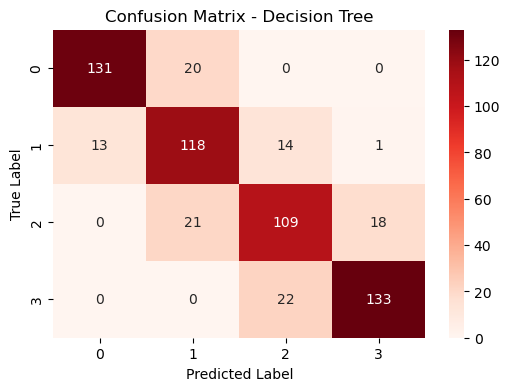

In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy Score for Decision Tree: {accuracy_dt:.4f}")

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### The Decision Tree model has an overall accuracy of 82%, showing moderate performance in classifying different smartphone price ranges.

#### Class 0 & 3 have high precision and recall (~88%), meaning they are predicted well.

#### Class 1 & 2 have lower precision and recall (~74%-77%), indicating more misclassifications.

#### The macro and weighted averages confirm balanced performance across all classes.
#### 

## 3) Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [53]:
y_pred_rf = rf_model.predict(X_test)

Accuracy Score for Random Forest: 0.8683
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       151
           1       0.82      0.82      0.82       146
           2       0.79      0.78      0.79       148
           3       0.92      0.91      0.92       155

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600



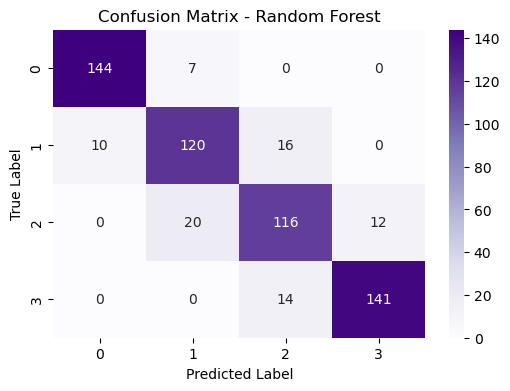

In [54]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy Score for Random Forest: {accuracy_rf:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


#### The Random Forest model achieves 87% accuracy, showing strong overall performance.

#### Class 0 & 3 have high precision & recall (~92%-95%), meaning they are well-classified.

#### Class 1 & 2 have slightly lower precision & recall (~79%-82%), leading to some misclassifications.

#### The macro and weighted averages confirm consistent predictions across all classes.

## 4) KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()  
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [58]:
y_pred_knn = knn_model.predict(X_test)

Accuracy Score for KNN: 0.5600
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.71      0.69       151
           1       0.38      0.47      0.42       146
           2       0.46      0.46      0.46       148
           3       0.80      0.60      0.69       155

    accuracy                           0.56       600
   macro avg       0.58      0.56      0.56       600
weighted avg       0.58      0.56      0.57       600



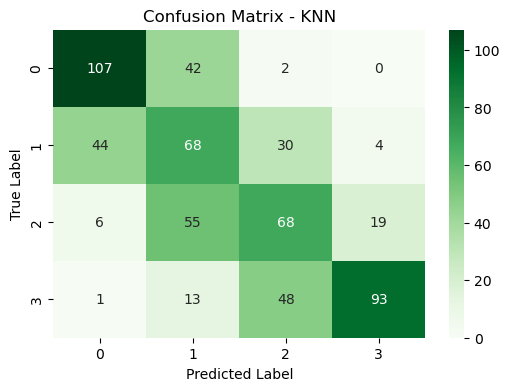

In [59]:
# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy Score for KNN: {accuracy_knn:.4f}")

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan', 'minkowski']  
}

knn_model = KNeighborsClassifier()

grid_search = GridSearchCV(knn_model, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Hyperparameters for KNN: {best_params}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Hyperparameters for KNN: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


In [61]:
# Train the KNN model with the best parameters
knn_best = KNeighborsClassifier(**best_params)
knn_best.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')

In [62]:
# Make predictions
y_pred_knn_best = knn_best.predict(X_test)


Optimized KNN Accuracy Score: 0.6617
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       151
           1       0.53      0.58      0.56       146
           2       0.54      0.54      0.54       148
           3       0.81      0.74      0.77       155

    accuracy                           0.66       600
   macro avg       0.67      0.66      0.66       600
weighted avg       0.67      0.66      0.66       600



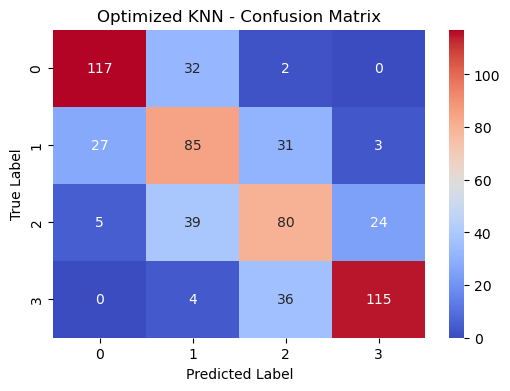

In [63]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy Score
accuracy_knn_best = accuracy_score(y_test, y_pred_knn_best)
print(f"Optimized KNN Accuracy Score: {accuracy_knn_best:.4f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn_best))

# Confusion Matrix
cm_knn_best = confusion_matrix(y_test, y_pred_knn_best)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn_best, annot=True, fmt="d", cmap="coolwarm")  
plt.title("Optimized KNN - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


#### The optimized KNN model achieves 66% accuracy, showing moderate performance.

#### Class 0 & 3 have better precision (~79%-81%), meaning they are classified fairly well.

#### Class 1 & 2 have low precision & recall (~53%-54%), leading to higher misclassifications.

#### Macro & weighted averages (~66%) confirm that overall classification is not highly accurate.

## 5) SVM 

In [66]:
from sklearn.svm import SVC
svm_model = SVC(random_state=42)  
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [67]:
y_pred_svm = svm_model.predict(X_test)

Accuracy Score for SVM: 0.8933
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       151
           1       0.82      0.88      0.84       146
           2       0.87      0.84      0.85       148
           3       0.95      0.94      0.94       155

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.90      0.89      0.89       600



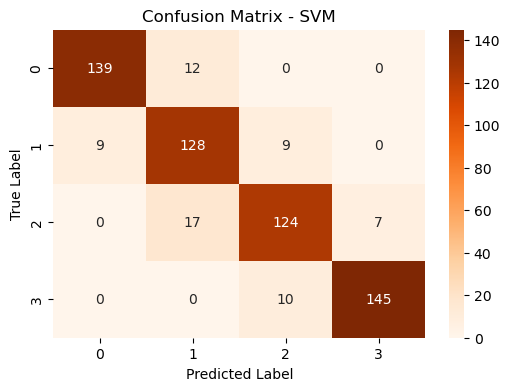

In [68]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy Score for SVM: {accuracy_svm:.4f}")

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Oranges") 
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


#### The SVM model achieves 89% accuracy, showing strong performance across all classes.

#### Class 0 & 3 have high precision & recall (~94%-95%), meaning they are well-classified.

#### Class 1 & 2 perform slightly lower (~82%-87%), but still maintain good balance.

#### Macro & weighted averages (~89%-90%) confirm consistent model performance.

## 6) XGBoost

In [71]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [72]:
y_pred_xgb = xgb_model.predict(X_test)

Accuracy Score for XGBoost: 0.9083
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       151
           1       0.86      0.92      0.89       146
           2       0.90      0.83      0.87       148
           3       0.92      0.94      0.93       155

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600



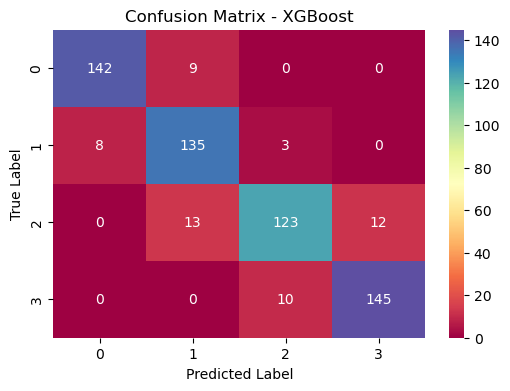

In [73]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy Score for XGBoost: {accuracy_xgb:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Spectral") 
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


#### The XGBoost model achieves 91% accuracy, indicating strong overall performance.

#### Class 0 & 3 have high precision & recall (~94%-95%), meaning they are well-classified.

#### Class 1 & 2 show slightly lower recall (~83%-92%), leading to a few misclassifications.

#### Macro & weighted averages (~91%) confirm stable predictions across all classes.

# Model Comparison

In [76]:
# Compare model performances
models = {
    "Logistic Regression": accuracy_score(y_test, y_pred_reg),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "SVM": accuracy_score(y_test, y_pred_svm),
    "XGBoost": accuracy_score(y_test, y_pred_xgb)
}

# Print model accuracy comparison
for model, accuracy in models.items():
    print(f"{model}: Accuracy = {accuracy:.4f}")

Logistic Regression: Accuracy = 0.9583
Decision Tree: Accuracy = 0.8183
Random Forest: Accuracy = 0.8683
KNN: Accuracy = 0.5600
SVM: Accuracy = 0.8933
XGBoost: Accuracy = 0.9083


#### Here the best model is the Logistic Regression, So we will save this model.

# Saving the Best Model

In [79]:
import joblib
joblib.dump(reg_model, "final_best_model.pkl")
print("Final model saved successfully!")

Final model saved successfully!


# How Model will help to expand the business:

### From our analysis: 

#### 1) Product Development: Focus on Key Features, Improve RAM, battery life, and display quality (pixel height and width) since customers care about these the most.

#### 2) Marketing Strategies: Create ads that highlight the strengths in RAM, battery life, and display quality to attract more customers.
   
#### 3) Pricing Strategies: Set prices based on how much customers value RAM, battery life, and display quality.Use real-time data to adjust prices and maximize sales and profits.

#### 5) Customer Satisfaction: Provide products that match what customers want, increasing their satisfaction and loyalty.

#### 6) Market Expansion: Identify new areas where high RAM, battery life, and display quality are important, and target these markets.

# Report on Challenges Faced:



#### 1) Data Quality Issues: Zero Values for Screen Width. Some screen width values were recorded as zero. We fixed this by replacing them with appropriate values.

#### 2) Model Overfitting: Decision Tree and Random Forest Overfitting. These models performed too well on training data but not on new data, even after tuning the settings. They captured training data patterns well but struggled with unseen data.

#### 3) Domain Analysis: Understanding the mobile market and the factors affecting prices was tough. It required a lot of research and application of this knowledge to improve the model.

#### By addressing these challenges through data cleaning, model tuning, and domain knowledge, we improved the model's accuracy and reliability, ensuring better predictions for real-world scenarios.